<a href="https://colab.research.google.com/github/KhudV/MML/blob/main/Lab3_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 3


### Дисциплина: Методы машинного обучения



##### Студент:  Худицкий Василий
##### Группа:   НКНбд-01-19

## Москва 2022
***

### Вариант №3

1. Набор данных: diamonds

2. Независимая переменная: features/carat

3. Зависимая переменная: features/x

4. Доп. признак: имеющий минимальную ковариацию с независимой переменной

5. Визуализация доп. признака – диаграмма размаха

6. Показатель качества регрессии – R^2 (коэффициент детерминации)

7. Степень полинома: 5

8. Параметры глубокой нейронной сети: кол-во скрытых слоев – 5, кол-во нейронов в скрытом слое – 32, функция активации – гиперболический тангенс.

**Решение**

1. Загрузите заданный в индивидуальном задании набор данных из Tensorflow Datasets, включая указанные в задании независимый признак и зависимый признак (отклик).

In [ ]:
!pip install -q tfds-nightly

     |████████████████████████████████| 4.3 MB 5.0 MB/s 
     |████████████████████████████████| 87 kB 5.7 MB/s 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
ds = tfds.load("diamonds", split='train')
df = tfds.as_dataframe(ds)
df.head()

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/53940 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/diamonds/1.0.0.incomplete2WUPHV/diamonds-train.tfrecord*...:   0%|          | …

Dataset diamonds downloaded and prepared to ~/tensorflow_datasets/diamonds/1.0.0. Subsequent calls will reuse this data.


,features/carat,features/clarity,features/color,features/cut,features/depth,features/table,features/x,features/y,features/z,price
0,1.26,2,4,2,60.599998,60.0,6.97,7.00,4.23,6546.0
1,0.80,3,4,4,62.099998,54.0,5.96,5.99,3.71,3030.0
2,0.56,4,2,4,61.700001,54.0,5.28,5.32,3.27,1915.0
3,1.51,3,6,1,64.000000,58.0,7.24,7.27,4.64,6936.0
4,0.33,6,5,4,62.200001,54.0,4.43,4.45,2.76,646.0


In [ ]:
x = np.array(df['features/carat'])
y = np.array(df['features/x'])
x.shape, y.shape

((53940,), (53940,))

2. Решите задачу полиномиальной регрессии для степени полинома, указанной в индивидуальном задании, при помощи нейронной сети с одним нейроном и оцените качество полученной модели по показателю, указанному в индивидуальном задании.

In [ ]:
X5 = np.array([x**n for n in range(1, 6)]).T
X5.shape

(53940, 5)

In [ ]:
reg_model = tf.keras.Sequential([
    tf.keras.Input(shape=(5,)),
    tf.keras.layers.Dense(units=1)
])
reg_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [ ]:
reg_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [ ]:
history = reg_model.fit(
    X5, y,
    epochs=100,
    # уровень выводимой информации
    verbose=1,
    # проверка (валидация) на 20% обучающих данных
    validation_split = 0.2)

Epoch 1/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.3473 - val_loss: 0.1579
Epoch 2/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.2761 - val_loss: 0.1978
Epoch 3/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.2778 - val_loss: 0.8562
Epoch 4/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.3048 - val_loss: 0.1791
Epoch 5/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.2655 - val_loss: 0.0855
Epoch 6/100
1349/1349 [==============================] - 4s 3ms/step - loss: 0.2896 - val_loss: 0.1254
Epoch 7/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.2522 - val_loss: 0.1391
Epoch 8/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.2776 - val_loss: 0.2133
Epoch 9/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.2868 - val_loss: 0.1414
Epoch 10/100
1349/1349 [==============================] - 2s 2ms/step - l

In [ ]:
y_predict_reg = reg_model.predict(X5)
y_predict_reg.shape

(53940, 1)

In [ ]:
y_predict_reg = y_predict_reg.reshape((53940,))

In [ ]:
mse = np.sum((y_predict_reg - y)**2) / len(y)
1 - mse/np.var(y)

0.9743582645008304

3. Постройте кривые обучения с зависимостью от количества эпох.

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.ylim([0, max(history.history['val_loss'])])
  plt.title('Функция потерь при обучении модели')
  plt.xlabel('Эпохи обучения')
  plt.ylabel('Функция потерь')
  plt.legend(['Обучающая выборка', 'Тестовая выборка'], loc='upper right')
  plt.grid(True)

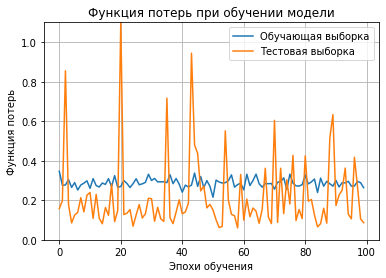

In [ ]:
plot_loss(history)

4. Визуализируйте точки набора данных на плоскости в виде диаграммы рассеяния (ось X – независимый признак, ось Y – зависимый признак), а также линию регрессии (другим цветом), подписывая оси и рисунок.

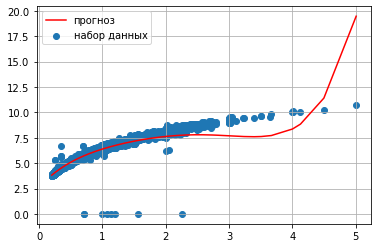

In [ ]:
plt.scatter(x, y, label='набор данных')
plt.plot(np.sort(x), y_predict_reg[np.argsort(x)], color='r', label='прогноз')
plt.legend(loc='upper left')
plt.grid();

5. Определите в исходном наборе данных признак (отличный от независимого и зависимого признаков), принимающий непрерывные значения и имеющий свойства, указанные в индивидуальном задании.

In [ ]:
df.cov()

,features/carat,features/clarity,features/color,features/cut,features/depth,features/table,features/x,features/y,features/z,price
features/carat,0.224687,-0.275484,0.234998,-0.071435,0.019167,0.192365,0.518484,0.515248,0.318917,1.742765e+03
features/clarity,-0.275484,2.713057,0.071818,0.347929,-0.159009,-0.590085,-0.687339,-0.674277,-0.426538,-9.646453e+02
features/color,0.234998,0.071818,2.893757,-0.038974,0.115221,0.100597,0.515770,0.512116,0.321998,1.170738e+03
features/cut,-0.071435,0.347929,-0.038974,1.246795,-0.348815,-1.081358,-0.157278,-0.154901,-0.117664,-2.382799e+02
features/depth,0.019167,-0.159009,0.115221,-0.348815,2.052404,-0.946840,-0.040641,-0.048009,0.095968,-6.085373e+01
features/table,0.192365,-0.590085,0.100597,-1.081358,-0.946840,4.992948,0.489643,0.468972,0.237996,1.133318e+03
features/x,0.518484,-0.687339,0.515770,-0.157278,-0.040641,0.489643,1.258347,1.248789,0.768487,3.958021e+03
features/y,0.515248,-0.674277,0.512116,-0.154901,-0.048009,0.468972,1.248789,1.304472,0.767320,3.943271e+03
features/z,0.318917,-0.426538,0.321998,-0.117664,0.095968,0.237996,0.768487,0.767320,0.498011,2.424713e+03
price,1742.765358,-964.645300,1170.737650,-238.279928,-60.853732,1133.318065,3958.021484,3943.270809,2424.712609,1.591563e+07


Из признаков, принимающих непрерывные значения, минимальную ковариацию с независимой переменной features/carat имеет признак features/depth

6. Визуализируйте этот признак в соответствии с индивидуальным заданием.

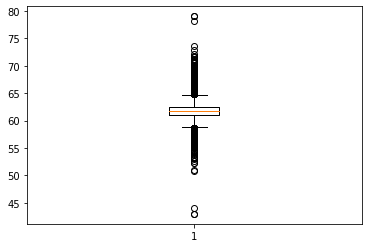

In [ ]:
plt.boxplot(x = df['features/depth'])
plt.show()

7. Сформируйте набор входных из двух признаков набора данных (независимый признак и определенный признак), создайте и адаптируйте нормализующий слой Tensorflow для двух признаков.

In [ ]:
X = np.array(df[['features/carat', 'features/depth']])
X.shape

(53940, 2)

In [ ]:
feature_normalizer = tf.keras.layers.Normalization(axis=None,input_shape=(2,))
feature_normalizer.adapt(X)

8. Используя созданный нормализующий слой, постройте нейронную сеть (нелинейный регресор) с количеством скрытых слоев, количеством нейронов и функцией активации, указанными в индивидуальном задании, и одним нейроном в выходном слое и обучите ее на наборе данных из двух признаков и отклика.

In [ ]:
large_model = tf.keras.Sequential([
    feature_normalizer,
    tf.keras.layers.Dense(units=32, activation='tanh'),
    tf.keras.layers.Dense(units=32, activation='tanh'),
    tf.keras.layers.Dense(units=32, activation='tanh'),
    tf.keras.layers.Dense(units=32, activation='tanh'),
    tf.keras.layers.Dense(units=32, activation='tanh'),
    tf.keras.layers.Dense(units=1)
])

large_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 2)                3         
 n)                                                              
                                                                 
 dense_1 (Dense)             (None, 32)                96        
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                      

In [ ]:
large_model.compile(loss='mse')

In [ ]:
history2 = large_model.fit(
    X, y,
    epochs=100,
    # уровень выводимой информации
    verbose=1,
    # проверка (валидация) на 30% обучающих данных
    validation_split = 0.3)

Epoch 1/100
1180/1180 [==============================] - 5s 4ms/step - loss: 1.4955 - val_loss: 1.1945
Epoch 2/100
1180/1180 [==============================] - 3s 3ms/step - loss: 1.1334 - val_loss: 0.9920
Epoch 3/100
1180/1180 [==============================] - 3s 3ms/step - loss: 0.9651 - val_loss: 1.2114
Epoch 4/100
1180/1180 [==============================] - 3s 2ms/step - loss: 0.8286 - val_loss: 1.3348
Epoch 5/100
1180/1180 [==============================] - 3s 3ms/step - loss: 0.7316 - val_loss: 0.4499
Epoch 6/100
1180/1180 [==============================] - 3s 2ms/step - loss: 0.6543 - val_loss: 1.4547
Epoch 7/100
1180/1180 [==============================] - 3s 2ms/step - loss: 0.5790 - val_loss: 0.3016
Epoch 8/100
1180/1180 [==============================] - 3s 2ms/step - loss: 0.5279 - val_loss: 0.3212
Epoch 9/100
1180/1180 [==============================] - 3s 2ms/step - loss: 0.4816 - val_loss: 0.2173
Epoch 10/100
1180/1180 [==============================] - 3s 3ms/step - l

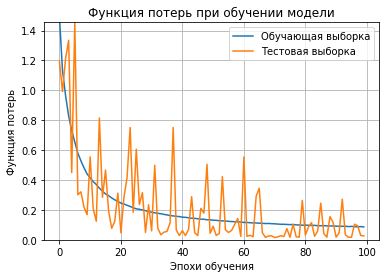

In [ ]:
plot_loss(history2)

9. Визуализируйте набор данных в виде точечного графика и прогноз нейронной сети в виде поверхности в трехмерном пространстве.

In [ ]:
from mpl_toolkits import mplot3d

In [ ]:
n_plot = 51
xs = X[:,0]
ys = X[:,1]
zs = y
x_plot = np.linspace(np.min(xs), np.max(xs), n_plot)
y_plot = np.linspace(np.min(ys), np.max(ys), n_plot)
x_mesh, y_mesh = np.meshgrid(x_plot, y_plot)
x_mesh.shape, y_mesh.shape

((51, 51), (51, 51))

In [ ]:
x_plot2 = np.reshape(x_mesh, [n_plot**2,1])
y_plot2 = np.reshape(y_mesh, [n_plot**2,1])
xy_2 = np.hstack([x_plot2, y_plot2])
xy_2.shape

(2601, 2)

In [ ]:
z = large_model.predict(xy_2)
z.shape

(2601, 1)

In [ ]:
z_mesh = z.reshape((n_plot, n_plot))
z_mesh.shape

(51, 51)

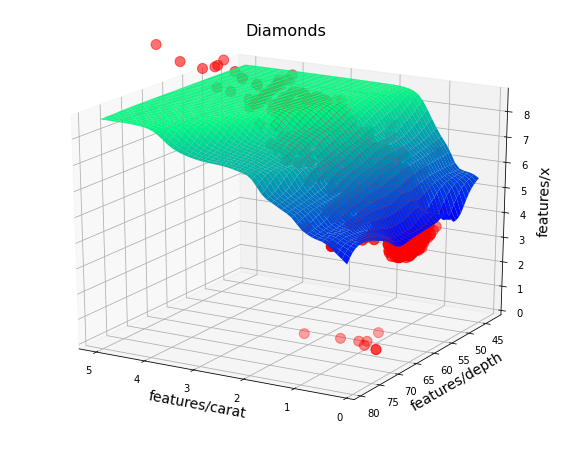

In [ ]:
from matplotlib import cm

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x_mesh, y_mesh, z_mesh, \
       rstride=1, cstride=1, linewidth=0.05, cmap=cm.winter, antialiased=True, \
       edgecolors='gray')
ax.scatter( xs, ys, zs, s=100, c='r' )

ax.set_xlabel('features/carat', fontsize=14)
ax.set_ylabel('features/depth', fontsize=14)
ax.set_zlabel('features/x', fontsize=14)
ax.set_title('Diamonds', fontsize=16)

ax.set_zlim(0., z_mesh.max())
ax.view_init(elev = 20, azim = 120)

10. Разбейте набор данных из двух признаков и отклика на обучающую и тестовую выборки и постройте кривые обучения для заданного показателя качества в зависимости от количества точек в обучающей выборке, подписывая оси и рисунок и создавая легенду.

In [ ]:
def train_test_split(X, y, test_ratio=0.2, seed=None):
    """возвращает X_train, X_test, y_train, y_test"""
    assert X.shape[0] == y.shape[0], \
        "Размер X должен быть равен размеру y"
    assert 0.0 <= test_ratio <= 1.0, \
        "Неверное значение test_ratio"

    if seed:
        np.random.seed(seed)

    shuffled_indexes = np.random.permutation(len(X))

    test_size = int(len(X) * test_ratio)
    test_indexes = shuffled_indexes[:test_size]
    train_indexes = shuffled_indexes[test_size:]

    X_train = X[train_indexes]
    y_train = y[train_indexes]

    X_test = X[test_indexes]
    y_test = y[test_indexes]

    return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 0.3)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((37758, 2), (16182, 2), (37758,), (16182,))

In [ ]:
def my_R(y_test, y_predict):
    mse = np.sum((y_predict - y_test)**2) / len(y_test)
    r = 1 - mse/np.var(y_test)
    return r

In [ ]:
train_score = []
test_score = []
for i in range(1758, 37758, 4000):
    large_model = tf.keras.Sequential([
      feature_normalizer,
      tf.keras.layers.Dense(units=32, activation='tanh'),
      tf.keras.layers.Dense(units=32, activation='tanh'),
      tf.keras.layers.Dense(units=32, activation='tanh'),
      tf.keras.layers.Dense(units=32, activation='tanh'),
      tf.keras.layers.Dense(units=32, activation='tanh'),
      tf.keras.layers.Dense(units=1)
  ])
    large_model.compile(loss='mse')
    large_model.fit(X_train[:i], y_train[:i], epochs=25, verbose=0)

    y_train_predict = large_model.predict(X_train[:i])
    y_train_predict = y_train_predict.reshape(-1)
    train_score.append(my_R(y_train[:i], y_train_predict))

    y_test_predict = large_model.predict(X_test)
    y_test_predict = y_test_predict.reshape(-1)
    test_score.append(my_R(y_test, y_test_predict))
    print('-->', i, ' done')

--> 1758  done
--> 5758  done
--> 9758  done
--> 13758  done
--> 17758  done
--> 21758  done
--> 25758  done
--> 29758  done
--> 33758  done


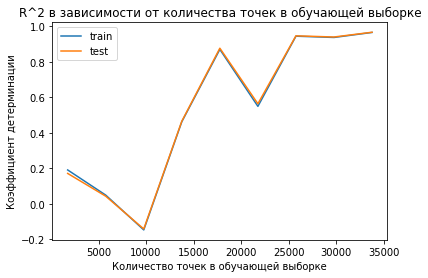

In [ ]:
plt.plot([i for i in range(1758, len(X_train), 4000)],
                               train_score, label="train")
plt.plot([i for i in range(1758, len(X_train), 4000)],
                               test_score, label="test")
plt.title('R^2 в зависимости от количества точек в обучающей выборке')
plt.xlabel('Количество точек в обучающей выборке')
plt.ylabel('Коэффициент детерминации')
plt.legend();